We will use the daily spreadsheet from EU CDC containing new cases per country per day.

In [1]:
!wget https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-04-03 11:59:04--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 13.227.198.44, 13.227.198.54, 13.227.198.83, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|13.227.198.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 361038 (353K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘COVID-19-geographic-disbtribution-worldwide.xlsx.1’

COVID-19-geographic 100%[===================>] 352.58K  --.-KB/s    in 0.03s   

2020-04-03 11:59:04 (12.9 MB/s) - ‘COVID-19-geographic-disbtribution-worldwide.xlsx.1’ saved [361038/361038]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-02,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
1,2020-04-01,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
2,2020-03-31,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
3,2020-03-30,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
4,2020-03-29,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0
5,2020-03-28,28,3,2020,16,1,Afghanistan,AF,AFG,37172386.0
6,2020-03-27,27,3,2020,0,0,Afghanistan,AF,AFG,37172386.0
7,2020-03-26,26,3,2020,33,0,Afghanistan,AF,AFG,37172386.0
8,2020-03-25,25,3,2020,2,0,Afghanistan,AF,AFG,37172386.0
9,2020-03-24,24,3,2020,6,1,Afghanistan,AF,AFG,37172386.0


Use a count on columns to see how many missing values we have. We would like to compare countries by geoId.

In [4]:
df.count()

dateRep                    8304
day                        8304
month                      8304
year                       8304
cases                      8304
deaths                     8304
countriesAndTerritories    8304
geoId                      8285
countryterritoryCode       8231
popData2018                8282
dtype: int64

Because we seem to miss some geoID entries, we will drop them. The resulting dataframe will be pivoted so we get one row per date, columns by geoId and the number of new cases in the cells. Again, show the first 10 rows to check our pivot.

In [5]:
df_geo = df.dropna().pivot(index = 'dateRep', columns = 'geoId', values = 'cases')
df_geo.head(10)

geoId,AD,AE,AF,AG,AL,AM,AO,AR,AT,AU,...,VA,VC,VE,VG,VI,VN,XK,ZA,ZM,ZW
dateRep,,,,,,,,,,,,,,,,,,,,,
2019-12-31,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-01,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-02,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-03,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-04,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-05,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-06,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-07,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2020-01-08,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Looking good, lots of missing values, meaning there's no data for that country on the current date. We can describe the columns to see what's there.

In [6]:
df_geo.describe()

geoId,AD,AE,AF,AG,AL,AM,AO,AR,AT,AU,...,VA,VC,VE,VG,VI,VN,XK,ZA,ZM,ZW
count,20.000000,88.000000,84.000000,14.000000,25.000000,85.000000,12.000000,27.000000,94.000000,94.000000,...,19.000000,10.000000,19.000000,7.000000,9.000000,90.000000,18.000000,26.000000,15.000000,13.000000
mean,19.500000,7.545455,2.285714,0.500000,10.360000,6.717647,0.666667,41.962963,113.946809,52.936170,...,0.315789,0.200000,7.526316,0.428571,3.333333,2.611111,6.222222,53.076923,2.400000,0.615385
std,14.961354,21.793656,6.455728,1.160239,7.381734,15.340277,0.984732,47.657013,242.708169,127.508364,...,0.945905,0.421637,11.606360,0.786796,5.766281,6.852695,8.314095,68.811001,3.680062,0.767948
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,6.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.250000,0.000000,0.000000
50%,21.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,18.000000,0.000000,1.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,2.500000,27.000000,1.000000,0.000000
75%,32.250000,2.000000,0.000000,0.000000,13.000000,1.000000,1.000000,71.000000,32.000000,11.750000,...,0.000000,0.000000,11.000000,0.500000,3.000000,2.000000,7.750000,52.750000,2.000000,1.000000
max,43.000000,143.000000,33.000000,4.000000,28.000000,71.000000,3.000000,167.000000,1141.000000,611.000000,...,4.000000,1.000000,48.000000,2.000000,17.000000,54.000000,30.000000,243.000000,12.000000,2.000000


Get to know your data by visualization, in this case the number of new cases per day for my home country.

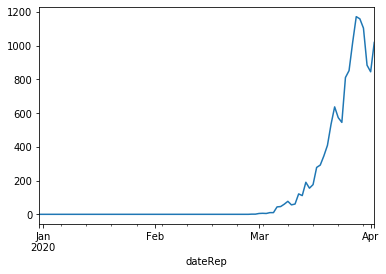

In [7]:
df_geo['NL'].plot()

What would China look like?

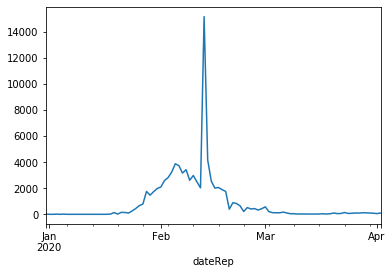

In [8]:
df_geo['CN'].plot()

The big spike in the middle was a change in counting, where they decided to count an extra 15000 cases.

To see the growth in number of cases, we can use cumulative sum, in this case we show CN and NL.

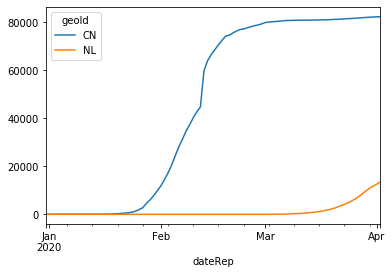

In [9]:
df_geo[['CN', 'NL']].cumsum().plot()

Because of the large difference in numbers, it may help to use a logarithmic scale.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


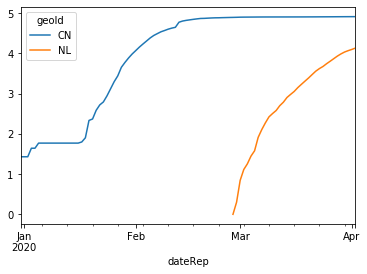

In [10]:
np.log10(df_geo[['CN', 'NL']].cumsum()).plot()

This clearly shows the phases in CN, first some external infections, then an incubation period, then the internal infections take off. Measures like isolation and social distancing seem to work, the curve flattens and stabilizes. For NL we are still at the phase where measures start to take effect. Also, no real startup curve there.

Perhaps some other countries also show this effect.

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


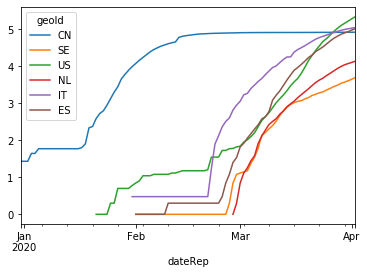

In [11]:
np.log10(df_geo[['CN', 'SE', 'US', 'NL', 'IT', 'ES']].cumsum()).plot()

Another interesting measure would be relative growth in number of cases per day. Therefore we need to divide the current day by the previous one, easily implemented by dividing the dataframe by the same dataframe shifted one row.

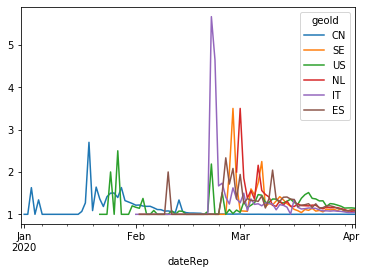

In [12]:
(df_geo.cumsum() / df_geo.shift().cumsum())[['CN', 'SE', 'US', 'NL', 'IT', 'ES']].plot()

From this factor (relative increase in cases since yesterday) we can calculate the number of days to double by some logarithmic magic. For NL and ES the number doubled every one or two days in the beginning but now it doubles in about a week.

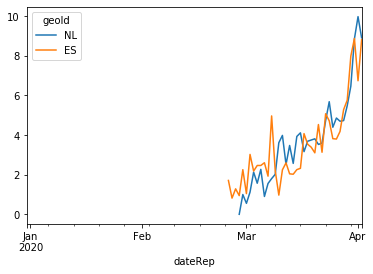

In [13]:
(np.log10(2) / np.log10(df_geo.cumsum() / df_geo.shift().cumsum()))[['NL', 'ES']].plot()

Rolling window functions can be used to smooth a curve, in this case the moving 3 day mean new cases for NL.

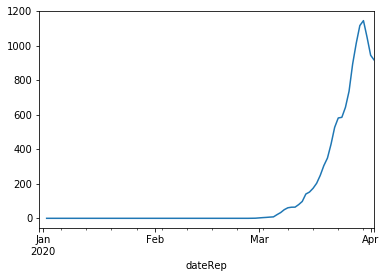

In [14]:
df_geo['NL'].rolling(3).mean().plot()

Let's look at 'the curve' which we are supposed to flatten. We assume that an infection lasts 21 days on average (which is under discussion), so we only count new cases from the last 21 days. By leaving out older infections this shows us the current number of infections.

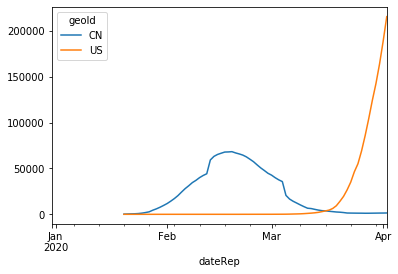

In [15]:
df_geo[['CN', 'US']].rolling(21).sum().plot()

Assuming for NL that we have a maximum of 2400 ICU places and about 10% of current infections ends up there, we can monitor the situation with the following graph. Note that we are now only showing data from first of March onwards.

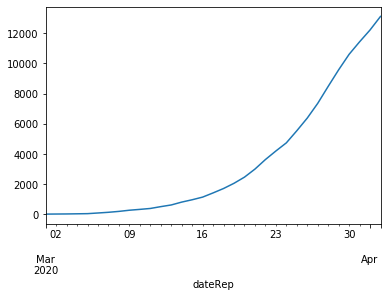

In [26]:
df_geo['NL'].rolling(21).sum().loc['20200301':].plot()

So currently we are just over half capacity and still rising rapidly, but the first signs of flattening are showing.

Keep exploring! Stay home, wash your hands, keep your distance.